In [52]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
import shapely.ops as so

In [53]:
VARIANT = 5
ITERATIONS = 5
TEMP_STEP = .3

In [54]:
plt.rcParams['figure.figsize'] = [12, 5] 

In [55]:
temps = []

temps.append(12 + .5 * VARIANT)

def new_t_from_current(currentTemp):
    return round(currentTemp + TEMP_STEP, 1)

for i in range(ITERATIONS - 1):
    temps.append(new_t_from_current(temps[i]))    

In [56]:
V = np.arange(0, 1001, 200)
T = np.arange(0, 61, 10)

In [57]:
lowT = [(0, 1), (10, 1), (20, 0)]
medT = [(10, 0), (20, 1), (30, 0)]
highT = [(20, 0), (30, 1), (40, 1), (50, 1), (60, 1)]

lowV = [(0, 1), (200, 1), (400, 0)]
medV = [(200, 0), (400, 1), (600, 0)]
highV = [(400, 0), (600, 1), (800, 1), (1000, 1)]

In [58]:
def get_y_from_x(ax, temps):
    result = []
    for temp in temps:
        meh = []
        for line in ax.lines:
            xData, yData = line.get_data()
            meh.append(round(np.interp(temp, xData, yData), 2))
        result.append(meh)
    return result

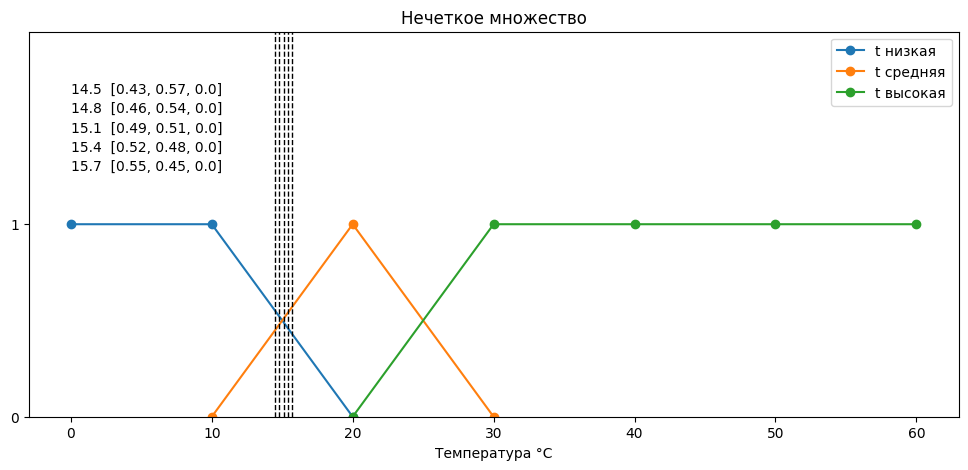

In [59]:
y = [point[1] for point in lowT]
plt.plot(T[:3], y, 'o-', label = "t низкая") 

y = [point[1] for point in medT]
plt.plot(T[1:4], y, 'o-', label = "t средняя")

y = [point[1] for point in highT]
plt.plot(T[2:7], y, 'o-', label = "t высокая")

vals = (get_y_from_x(plt.gca(), temps))
for i, temp in enumerate(temps):
    if TEMP_STEP >= 1.8:
        plt.text(temp + .5, 1.5, f"{temp}  [{', '.join([str(val) for val in  vals[i]])}]", color='black', verticalalignment='center', fontsize = 10, rotation = 90)
    else:
        plt.text(0, (i / 10) + 1.3, f"{temps[len(temps) - 1 - i]}  [{', '.join([str(val) for val in  vals[i]])}]", color='black', verticalalignment='center', fontsize = 10)
    plt.axvline(x=temp, color='black', linestyle='--', linewidth = 1)

plt.xlabel('Температура °C')
plt.title('Нечеткое множество')

plt.ylim(0, 2)

plt.xticks(T)
plt.yticks([0, 1])

plt.legend()
plt.show()

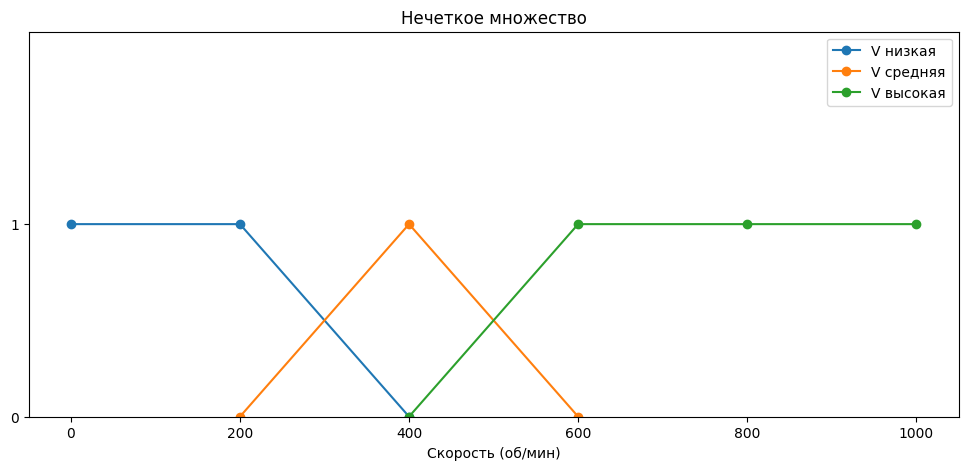

In [60]:
y = [point[1] for point in lowV]
plt.plot(V[:3], y, 'o-', label = "V низкая") 

y = [point[1] for point in medV]
plt.plot(V[1:4], y, 'o-', label = "V средняя")

y = [point[1] for point in highV]
plt.plot(V[2:7], y, 'o-', label = "V высокая")

plt.xlabel('Скорость (об/мин)')
plt.title('Нечеткое множество')

plt.ylim(0, 2)

plt.xticks(V)
plt.yticks([0, 1])

plt.legend()
plt.show()

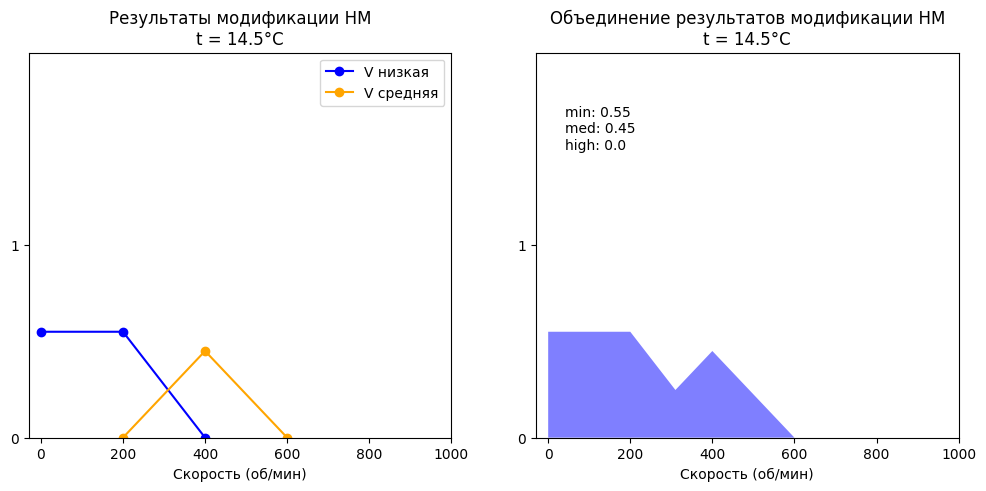

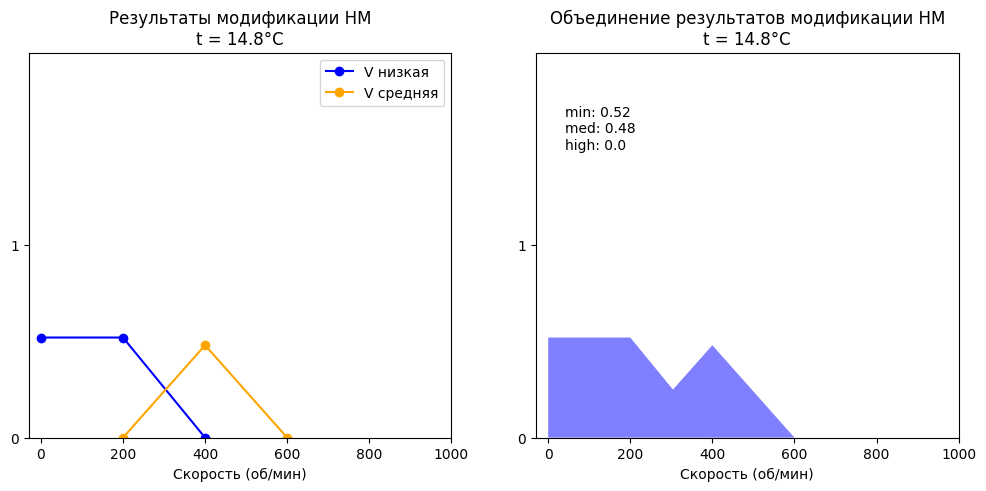

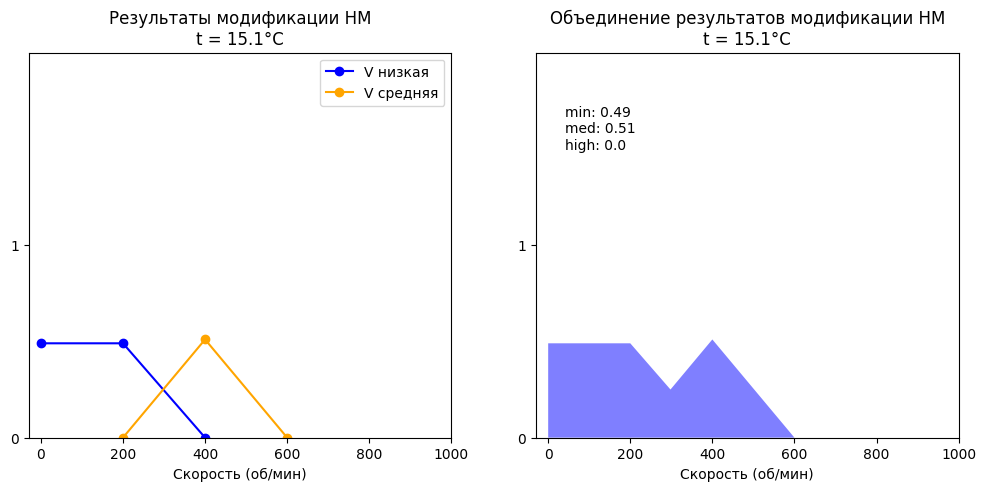

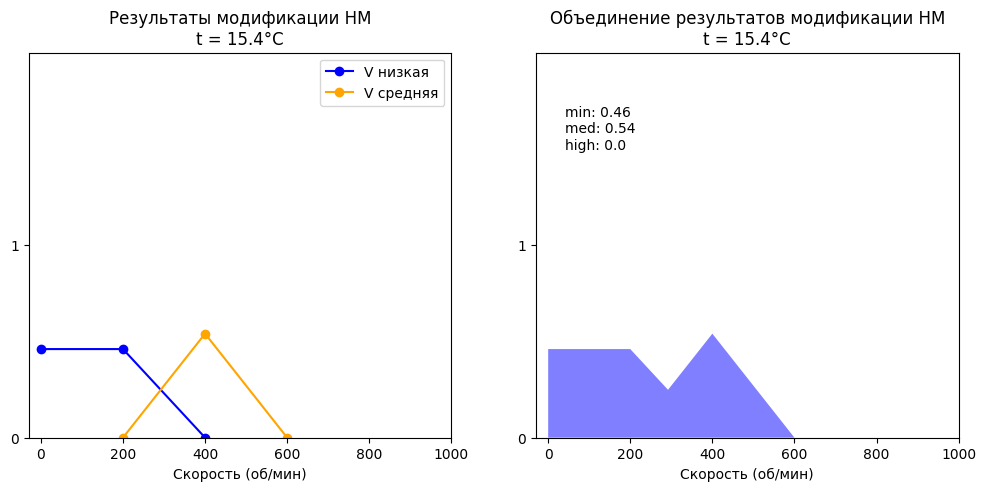

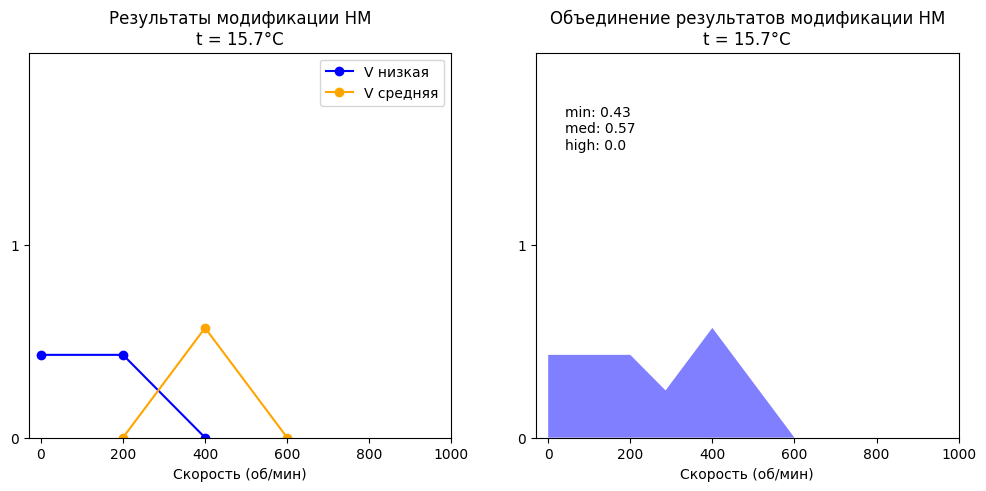

In [61]:
polygons = []

for i, val in enumerate(vals):

    axes = plt.subplot(1, 2, 1)
    
    if val[0] != 0:
        y = [point[1] * val[0] for point in lowV]
        plt.plot(V[:3], y, 'o-', label = "V низкая", color = 'b')

    if val[1] != 0:
        y = [point[1] * val[1] for point in medV]
        plt.plot(V[1:4], y, 'o-', label = "V средняя", color = 'orange')

    if val[2] != 0:
        y = [point[1] * val[2] for point in highV]
        plt.plot(V[2:7], y, 'o-', label = "V высокая", color = 'r')

    plt.xlabel('Скорость (об/мин)')
    plt.title(f'Результаты модификации НМ\nt = {temps[i]}°C')

    plt.ylim(0, 2)

    plt.xticks(V)
    plt.yticks([0, 1])

    plt.legend()

    axes = plt.subplot(1, 2, 2)

    if val[0] != 0:
        x = [V[0]]
        y = [0]
        x += list(V[:3])
        y += [point[1] * val[0] for point in lowV]
        t = tuple(zip(x, y))
        p0 = Polygon(t)

    if val[1] != 0:
        x = [V[1]]
        y = [0]
        x += list(V[1:4])
        y += [point[1] * val[1] for point in medV]
        t = tuple(zip(x, y))
        p1 = Polygon(t)
    

    if val[2] != 0:
        x = list(V[2:7])
        y = [point[1] * val[2] for point in highV]
        x.append(V[5])
        y.append(0)
        t = tuple(zip(x, y))
        p2 = Polygon(t)
    if val[0] != 0 and val[1] != 0:
        union = so.unary_union([p0, p1])
        x, y = union.exterior.xy
        polygons.append(union)
    elif val[1] != 0 and val[2] != 0:
        union = so.unary_union([p1, p2])
        x, y = union.exterior.xy
        polygons.append(union)

    plt.fill(x, y, alpha=0.5, fc='blue', ec='none')
    plt.text(40, 1.5, f'min: {val[0]}\nmed: {val[1]}\nhigh: {val[2]}')
    plt.xlabel('Скорость (об/мин)')
    plt.title(f'Объединение результатов модификации НМ\nt = {temps[i]}°C')

    plt.ylim(0, 2)

    plt.xticks(V)
    plt.yticks([0, 1])

    plt.show()

$$
Площадь\ полигона\\
$$

$$
A = \frac{1}{2} \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) $$

In [62]:
A = []

for polygon in polygons:
    area = 0
    x = (polygon.exterior.xy[0])[::-1]
    y = (polygon.exterior.xy[1])[::-1]
    for i in range(len(x) - 1):
        area += x[i] * y[i + 1] - x[i + 1] * y[i]
    A.append(round(area / 2, 3))

print(' '.join([str(area) for area in A]))

230.25 227.04 224.01 221.16 218.49


$$
Центр\ тяжести\ полигона\\
$$

$$
C_x = \frac{1}{6A} \sum_{i=1}^{n} (x_i + x_{i+1})(x_i y_{i+1} - x_{i+1} y_i)\\
C_y = \frac{1}{6A} \sum_{i=1}^{n} (y_i + y_{i+1})(x_i y_{i+1} - x_{i+1} y_i) $$

In [63]:
CX = []
CY = []
for j, polygon in enumerate(polygons):
    cx = 0
    cy = 0
    x = (polygon.exterior.xy[0])[::-1]
    y = (polygon.exterior.xy[1])[::-1]
    for i in range(len(x) - 1):
        cx += (x[i] + x[i + 1]) * (x[i] * y[i + 1] - x[i + 1] * y[i])
        cy += (y[i] + y[i + 1]) * (x[i] * y[i + 1] - x[i + 1] * y[i])
    CX.append(round(cx / (6 * A[j]), 3))
    CY.append(round(cy / (6 * A[j]), 3))

print(' '.join([str(x) for x in CX]))
print(' '.join([str(y) for y in CY]))

235.219 242.888 250.821 259.002 267.417
0.225 0.217 0.211 0.206 0.203


$$
Центр\ тяжести\ суперпозиции\\
$$

$$
X_{цт} = \frac {\sum_{i = 1}^{n} X_{cF_{i}} * S_{F_{i}}}{ \sum_{i = 1}^{n} S_{F_{i}} } \quad
Y_{цт} = \frac {\sum_{i = 1}^{n} Y_{cF_{i}} * S_{F_{i}}}{ \sum_{i = 1}^{n} S_{F_{i}} }
$$

In [64]:
valuesCalculatedByHand = [
    (235.21, 0.224),
    (242.88, 0.217),
    (250.81, 0.210),
    (258.99, 0.206),
    (267.41, 0.202),
]

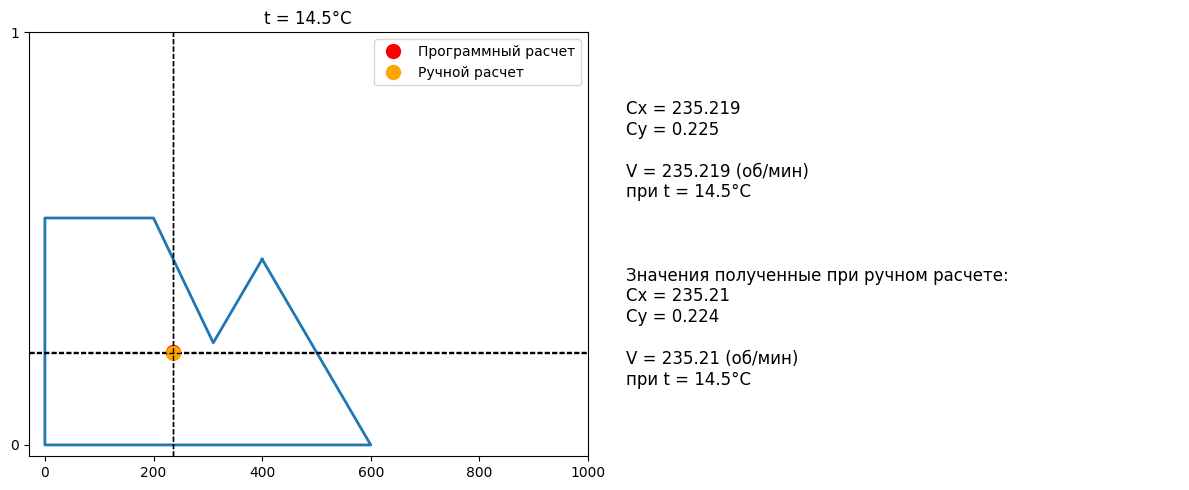

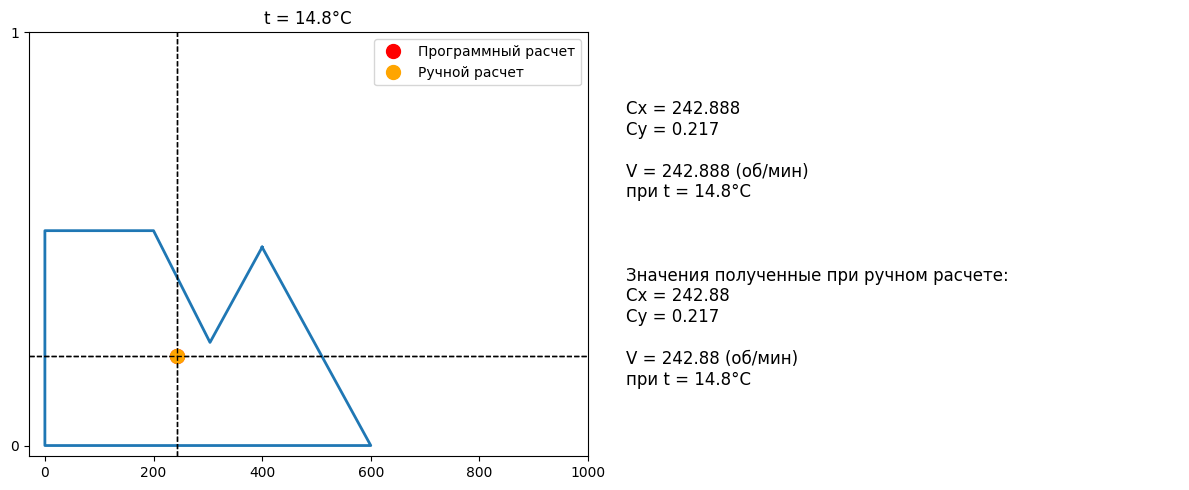

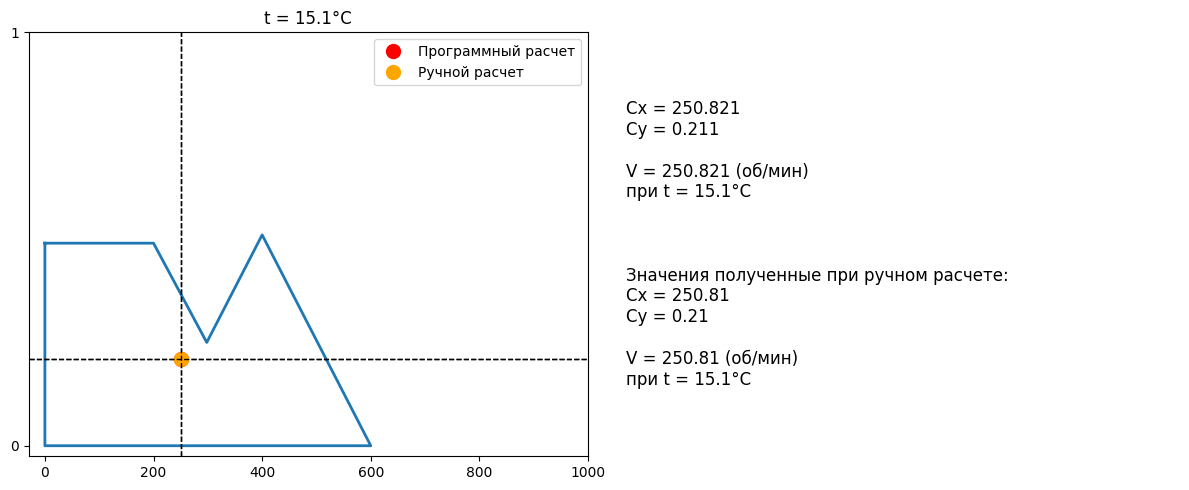

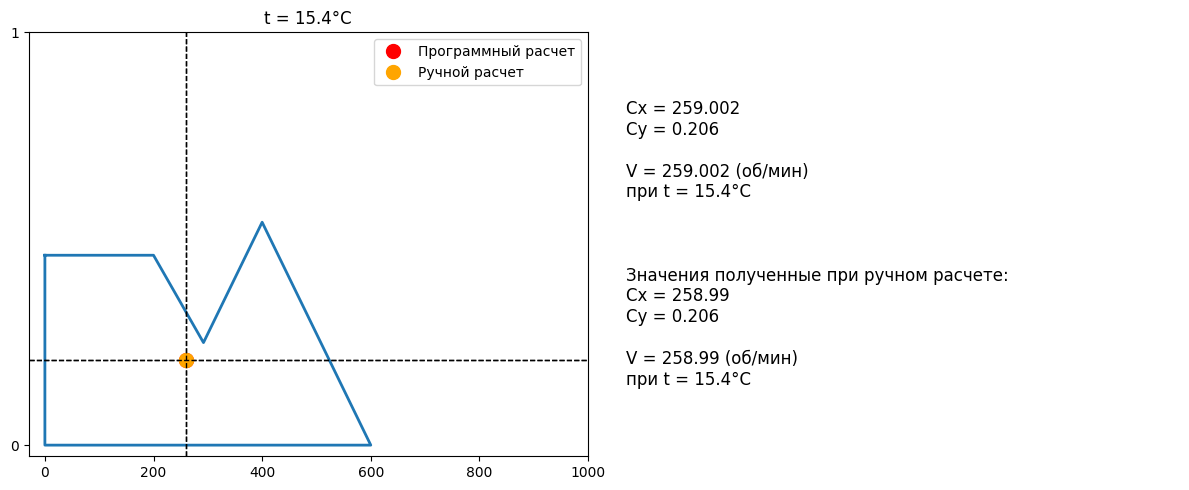

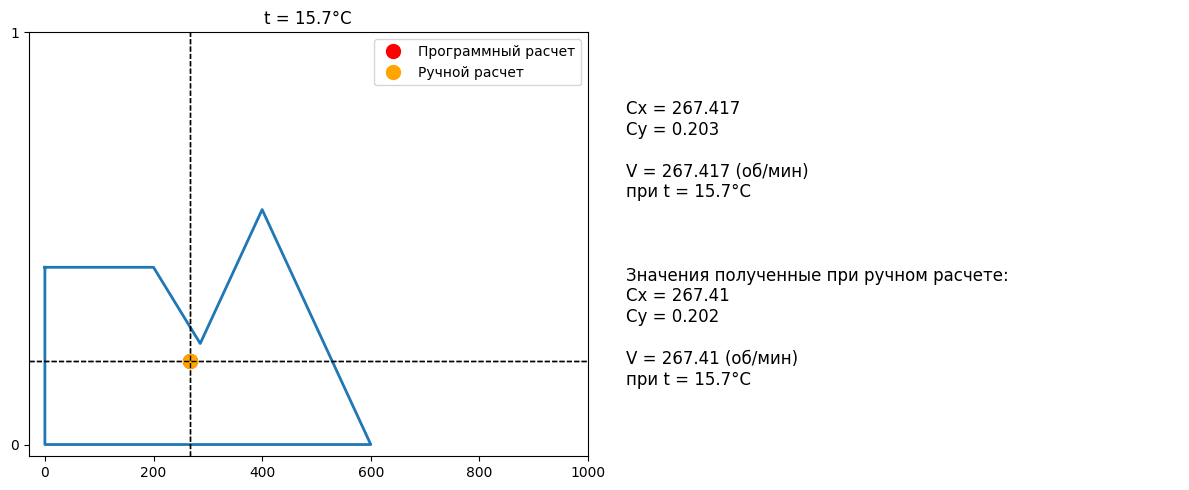

In [65]:
for i, polygon in enumerate(polygons):
    x, y = polygon.exterior.xy
    fig, ax = plt.subplots(1, 2)

    ax[0].set_title(f't = {temps[i]}°C')
    ax[0].plot(x, y, linewidth = 2)
    ax[0].plot(CX[i], CY[i], 'o', color='red', markersize = 10, label='Программный расчет')
    ax[0].axvline(x=CX[i], color='black', linestyle='--', linewidth = 1)
    ax[0].axhline(y=CY[i], color='black', linestyle='--', linewidth = 1)

    ax[0].plot(valuesCalculatedByHand[i][0], valuesCalculatedByHand[i][1], 'o', color='orange', markersize = 10, label='Ручной расчет')
    ax[0].axvline(x=valuesCalculatedByHand[i][0], color='black', linestyle='--', linewidth = 1)
    ax[0].axhline(y=valuesCalculatedByHand[i][1], color='black', linestyle='--', linewidth = 1)


    plt.sca(ax[0])
    plt.xticks(V)
    plt.yticks([0, 1])

    t = f'Значения полученные при ручном расчете:\nCx = {valuesCalculatedByHand[i][0]}\nCy = {valuesCalculatedByHand[i][1]}\n\nV = {valuesCalculatedByHand[i][0]} (об/мин)\nпри t = {temps[i]}°C'
    ax[1].text(0.01, 0.5, f'Cx = {CX[i]}\nCy = {CY[i]}\n\nV = {CX[i]} (об/мин)\nпри t = {temps[i]}°C\n\n\n\n{t}', fontsize=12, ha='left', va='center')
    ax[1].axis('off')
    plt.tight_layout()
    plt.legend()
    plt.show()
        

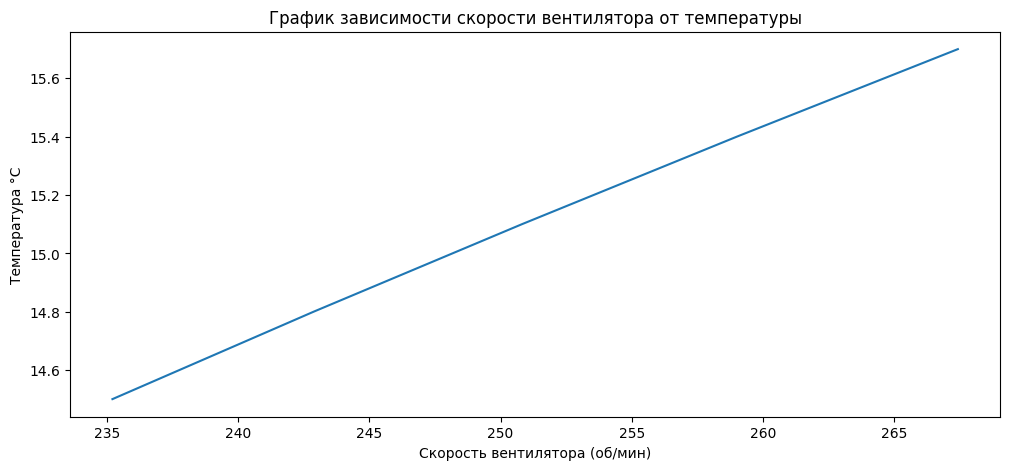

In [66]:
plt.plot(CX, temps)
plt.title('График зависимости скорости вентилятора от температуры')
plt.xlabel('Скорость вентилятора (об/мин)')
plt.ylabel('Температура °C')
plt.show()